# HumanChromoLocationObdelava

Lokacija genov na kromosomih in iskanje genov, ki se izražajo hkrati, zaradi svoje lokacije.

**IMPORT**

In [177]:
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [176]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**UVOZ PODATKOV**

In [5]:
print("Zacetek")
fp = open("HumanChromoLocation.csv", "rt")
reader = DictReader(fp)
data = np.empty((0,3), dtype = str)


for row in reader:
    data = np.vstack((data, np.array([row["Symbol"], row["chromosome"], row["map_location"]])))

fp.close()

Zacetek


array([['A1BG', '19', '19q13.43'],
       ['A2M', '12', '12p13.31'],
       ['A2MP1', '12', '12p13.31'],
       ..., 
       ['PRPS1P1', '2', '2q24.3'],
       ['CTRCT37', '12', '12q24.2-q24.3'],
       ['DFNB96', '1', '1p36.31-p36.13']],
      dtype='<U33')

data = [str, str, str] v obliki [**ime gena**, **št.kromosoma**, **lokacija na kromosomu**]

In [39]:
"""kromosom = dict()
for row in data:
    if row[1] in kromosom:
        kromosom[row[1]] += [row[0]]
    else:
        kromosom[row[1]] = [row[0]]
vsiKromosomi = []
for key,value in kromosom.items():
    vsiKromosomi += [key]
vsiKromosomi.sort()
"""

#dataKromo = [imeGena, stKromosoma, p ali q, stBand, lega]
dataKromo = np.empty((0,5), dtype = str)
i=0
data_now = data
for row in data_now:
    if i%(len(data_now)//10)==0: print("Progress: {}%".format(i/(len(data_now)//100)))
    i+=1
    
    trenutno = [row[0], row[1]]
    if "-" in row[2]:
        row[2] = row[2].split("-")[0]
    if "|" in row[2]:
        row[2] = row[2].split("|")[0]
        
        
    if "p" in row[2]:
        trenutno += ["p"]
        if "." in row[2]:
            lok = row[2].split("p")[1].split(".")
            trenutno += [lok[0]]
            trenutno += [lok[1]]
        else:
            trenutno += [row[2].split("p")[1], "0"]
    elif "q" in row[2]:
        trenutno += ["q"]
        if "." in row[2]:
            lok = row[2].split("q")[1].split(".")
            trenutno += [lok[0]]
            trenutno += [lok[1]]
        else:
            trenutno += [row[2].split("q")[1], "0"]
    else:
        continue
    dataKromo = np.vstack((dataKromo, np.array(trenutno)))

Progress: 0.0%
Progress: 10.018518518518519%
Progress: 20.037037037037038%
Progress: 30.055555555555557%
Progress: 40.074074074074076%
Progress: 50.092592592592595%
Progress: 60.111111111111114%
Progress: 70.12962962962963%
Progress: 80.14814814814815%
Progress: 90.16666666666667%
Progress: 100.18518518518519%


In [102]:
data_dict = dict()
for row in dataKromo:
    data_dict[row[0]] = row[1:]
data_dict

{'A1BG': array(['19', 'q', '13', '43'],
       dtype='<U27'), 'A2M': array(['12', 'p', '13', '31'],
       dtype='<U27'), 'A2MP1': array(['12', 'p', '13', '31'],
       dtype='<U27'), 'NAT1': array(['8', 'p', '22', '0'],
       dtype='<U27'), 'NAT2': array(['8', 'p', '22', '0'],
       dtype='<U27'), 'NATP': array(['8', 'p', '22', '0'],
       dtype='<U27'), 'SERPINA3': array(['14', 'q', '32', '13'],
       dtype='<U27'), 'AADAC': array(['3', 'q', '25', '1'],
       dtype='<U27'), 'AAMP': array(['2', 'q', '35', '0'],
       dtype='<U27'), 'AANAT': array(['17', 'q', '25', '1'],
       dtype='<U27'), 'AARS': array(['16', 'q', '22', '1'],
       dtype='<U27'), 'AAVS1': array(['19', 'q', '13', '0'],
       dtype='<U27'), 'ABAT': array(['16', 'p', '13', '2'],
       dtype='<U27'), 'ABCA1': array(['9', 'q', '31', '1'],
       dtype='<U27'), 'ABCA2': array(['9', 'q', '34', '3'],
       dtype='<U27'), 'ABCA3': array(['16', 'p', '13', '3'],
       dtype='<U27'), 'ABCB7': array(['X', 'q', '13', 

**METODE ZA UPORABO V PRIMERJAVAH**

In [112]:
def istiKromosom(imeGen1, imeGen2): #samo imena genov
    return (data_dict[imeGen1][0] == data_dict[imeGen2][0])

def istiP_Q(imeGen1, imeGen2):
    return (istiKromosom(imeGen1, imeGen2) and data_dict[imeGen1][1] == data_dict[imeGen2][1])

def istiBand(imeGen1, imeGen2):
    return (istiP_Q(imeGen1, imeGen2) and data_dict[imeGen1][2] == data_dict[imeGen2][2])

def razdaljaMedGenoma(imeGen1, imeGen2): # -2: Nista povezana; -1: Isti band; >0: Razdalja
    razdalja = -2
    if istiBand(imeGen1, imeGen2):
        razdalja = -1
        if data_dict[imeGen1][3] != "0" and data_dict[imeGen2][3] != "0":
            razdalja = abs(int(data_dict[imeGen1][3])-int(data_dict[imeGen2][3]))
    return razdalja

    

**PRIMERJAVA RAZDALJ MED GENI IN EKSPRESIJAMI V RAZLIČNIH TKIVIH**

Ekspresijski podatki - Uvoz

In [127]:
data_exp = np.loadtxt('testfile.csv', delimiter=",", skiprows=1, dtype = str)
data_exp_dict = dict()
for row in data_exp:
    data_exp_dict[row[0]] = np.array(row[2:39], dtype = float)
data_exp

array([['TSPAN6', 'ENSG00000000003', '31.5', ..., '0.7', '25.04974919',
        '32.7'],
       ['TNMD', 'ENSG00000000005', '10.1', ..., '0', '5.543253126', '0.3'],
       ['DPM1', 'ENSG00000000419', '45.6', ..., '10.2', '14.32245169', '47'],
       ..., 
       ['SSU72P3', 'ENSG00000284546', '0', ..., '0', '0', '0'],
       ['RP11-321E2.5', 'ENSG00000284552', '0', ..., '0', '0.096012539',
        '0'],
       ['CTA-150C2.22', 'ENSG00000284554', '0.6', ..., '0', '1.042381664',
        '0.7']],
      dtype='<U17')

In [169]:
tkiva = []
fp = open("testfile.csv", "rt")
tempo = DictReader(fp)
for row in tempo:
    for key, value in row.items():
        if key != "gene name" and key != "geneId" and key != "max" and key != "min" and key != "std diviacija" and key != "mediana":
            tkiva += [key]
    break
tkiva[:10]

['adipose tissue',
 'adrenal gland',
 'appendix',
 'bone marrow',
 'breast',
 'cerebral cortex',
 'cervix, uterine',
 'colon',
 'duodenum',
 'endometrium']

Normalizacija ekspresijskih vrednosti - glede na max vrednost

In [186]:
data_norm = dict()
for key,value in data_exp_dict.items():
    vsota = max(value)
    if vsota == 0: vsota =1
    data_norm[key] = []
    for elt in value:
        data_norm[key] += [elt/vsota]
data_norm

{'TSPAN6': [0.30852105778648387,
  0.25857002938295787,
  0.090107737512242894,
  0.0068560235063663075,
  0.5230166503428012,
  0.1811949069539667,
  0.53085210577864839,
  0.47502448579823703,
  0.26542605288932419,
  0.37708129285014691,
  0.3202742409402547,
  0.48677766895200791,
  1.0,
  0.3937316356513223,
  0.052889324191968665,
  0.61018609206660135,
  0.55631733594515187,
  0.18903036238981394,
  0.04701273261508325,
  0.70323212536728696,
  0.058765915768854066,
  0.78942213516160631,
  0.42899118511263468,
  0.48481880509304603,
  0.57590597453476988,
  0.33300685602350638,
  0.23702252693437806,
  0.015670910871694418,
  0.076395690499510283,
  0.18413320274240941,
  0.1792360430950049,
  0.14005876591576888,
  0.20763956904995104,
  0.82957884427032325,
  0.52105778648383938,
  0.099902056807051914,
  0.5416258570029383],
 'TNMD': [0.30421686746987947,
  0.0060240963855421681,
  0.021084337349397589,
  0.0,
  0.1295180722891566,
  0.0,
  0.024096385542168672,
  0.02108433

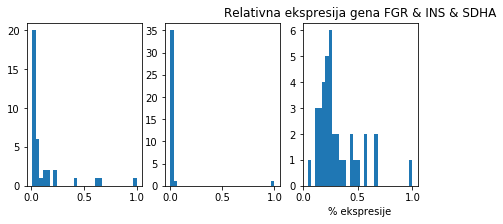

In [187]:
#histogram za gen 'FGR'

fig, axis = plt.subplots(1,3, figsize=(7,3))
axis[0].hist(data_norm['FGR'], bins=30) #NAKLJUČEN GEN
axis[1].hist(data_norm["INS"], bins=30) #TKIVNO SPECIFIČNE (inzolin)
axis[2].hist(data_norm["SDHA"], bins=30) #HIŠNI GEN
plt.title("Relativna ekspresija gena FGR & INS & SDHA")
plt.xlabel("% ekspresije")
#plt.ylabel("Števil tkiv")
plt.show()


ISKANJE GENOV BLIZU INZULINA - INS

In [191]:
geneName = "SDHA" #SPREMINAJ ZA DRUG GEN


genes_close = []
for key in data_dict:
    razd = razdaljaMedGenoma(geneName, key)
    if razd==0:
        genes_close += [key]
genes_close

['NDUFS6',
 'SDHA',
 'SLC6A3',
 'SLC9A3',
 'TERT',
 'TRIP13',
 'PDCD6',
 'SLC12A7',
 'TPPP',
 'EXOC3',
 'PP7080',
 'IRX4',
 'CEP72',
 'AHRR',
 'MRPL36',
 'BRD9',
 'IRX1',
 'ZDHHC11',
 'LPCAT1',
 'CLPTM1L',
 'NKD2',
 'EXOC3-AS1',
 'CCDC127',
 'PLEKHG4B',
 'C5orf38',
 'IRX2',
 'LINC01019',
 'MCDR3',
 'SLC6A19',
 'SLC6A18',
 'LRRC14B',
 'ZDHHC11B',
 'SDHAP3',
 'LOC728613',
 'LOC100128803',
 'LOC100130748',
 'LOC100132773',
 'MYP16',
 'LNCR3',
 'SLC9A3-AS1',
 'SPCS2P3',
 'BCC3',
 'LOC100310782',
 'GLM8',
 'LOC100421419',
 'MIR4277',
 'LOC100506688',
 'LINC01511',
 'LOC100506858',
 'MIR4457',
 'MIR4456',
 'MIR4635']

In [192]:
genes_close_dict = dict()
genes_close_array = np.empty((0,37), dtype = float)
genes = []
for elt in genes_close:
    if elt in data_norm: genes += [elt]
genes_close = genes
for elt in genes_close:
    if elt in data_norm:
        genes_close_dict[elt] = data_norm[elt]
        genes_close_array = np.vstack((genes_close_array, data_norm[elt]))
genes_close_array

array([[ 0.48928571,  0.42857143,  0.44375   , ...,  0.20625   ,
         0.15267857,  0.15535714],
       [ 0.3005223 ,  0.48091603,  0.17717959, ...,  0.20610687,
         0.14262756,  0.21735637],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09677419,  0.30645161,  0.03225806, ...,  0.20967742,
         0.06451613,  0.19354839]])

Grafični prikaz ekspresij genov v bližini INS glede na povprečno ekspresijo

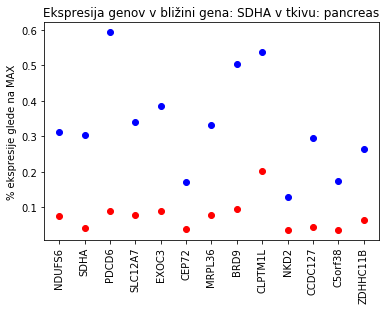

In [197]:
tkivo_st=20 #SPREMINJAJ ZA DRUGO TKIVO
SPODNJA_MEJA = 0.03

plt.figure()
for gene in genes_close:
    if genes_close_dict[gene][tkivo_st]>SPODNJA_MEJA:
        plt.plot(gene, genes_close_dict[gene][tkivo_st], "ro", )
        plt.plot(gene, (sum(genes_close_dict[gene])-genes_close_dict[gene][tkivo_st])/len(genes_close_dict[gene]), "bo")
plt.xticks(rotation=90)
plt.title("Ekspresija genov v bližini gena: {} v tkivu: {}".format(geneName, tkiva[tkivo_st]))
plt.ylabel("% ekspresije glede na MAX")
plt.legend()
plt.show()